# Chapter: Recurrent Neural Networks


# Topic: Exploring TEP dataset

In [15]:
# read data
import pyreadr
fault_free_training_data = pyreadr.read_r('TEP_FaultFree_Training.RData')['fault_free_training'] # pandas dataframe
fault_free_testing_data = pyreadr.read_r('TEP_FaultFree_Testing.RData')['fault_free_testing']
faulty_training_data = pyreadr.read_r('TEP_Faulty_Training.RData')['faulty_training']
faulty_testing_data = pyreadr.read_r('TEP_Faulty_Testing.RData')['faulty_testing']

In [16]:
# remove fault 3,9,15 data from faulty dataset
faulty_training_data = faulty_training_data[faulty_training_data['faultNumber'] != 3]
faulty_training_data = faulty_training_data[faulty_training_data['faultNumber'] != 9]
faulty_training_data = faulty_training_data[faulty_training_data['faultNumber'] != 15]

faulty_testing_data = faulty_testing_data[faulty_testing_data['faultNumber'] != 3]
faulty_testing_data = faulty_testing_data[faulty_testing_data['faultNumber'] != 9]
faulty_testing_data = faulty_testing_data[faulty_testing_data['faultNumber'] != 15]

In [17]:
# sample process values from selected simulation runs
# fault free
faultFree_simulationData = fault_free_training_data[fault_free_training_data['simulationRun'] == 1]
faultFree_simulationData = faultFree_simulationData.iloc[:,3:13]

# faulty
faulty_simulationData_1 = faulty_training_data[faulty_training_data['simulationRun'] == 1]
faulty_simulationData_1 = faulty_simulationData_1[faulty_simulationData_1['faultNumber'] == 1]
faulty_simulationData_1 = faulty_simulationData_1.iloc[:,3:13]

faulty_simulationData_2 = faulty_training_data[faulty_training_data['simulationRun'] == 1]
faulty_simulationData_2 = faulty_simulationData_2[faulty_simulationData_2['faultNumber'] == 8]
faulty_simulationData_2 = faulty_simulationData_2.iloc[:,3:13]

faulty_simulationData_3 = faulty_training_data[faulty_training_data['simulationRun'] == 1]
faulty_simulationData_3 = faulty_simulationData_3[faulty_simulationData_3['faultNumber'] == 12]
faulty_simulationData_3 = faulty_simulationData_3.iloc[:,3:13]

In [18]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
faultFree_simulationData_scaled = scaler.fit_transform(faultFree_simulationData)
faulty_simulationData_1_scaled = scaler.transform(faulty_simulationData_1)
faulty_simulationData_2_scaled = scaler.transform(faulty_simulationData_2)
faulty_simulationData_3_scaled = scaler.transform(faulty_simulationData_3)

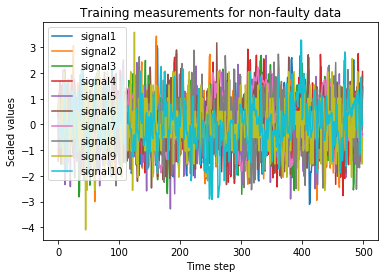

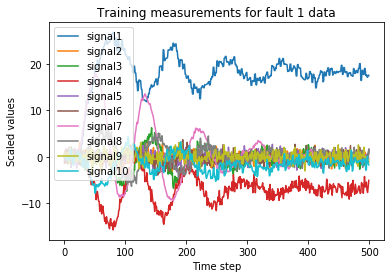

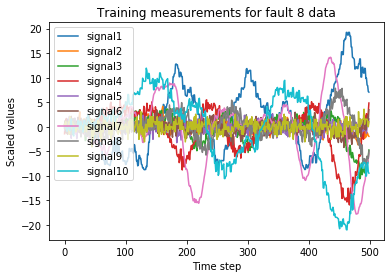

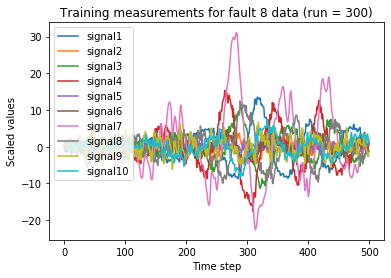

In [19]:
# plots
import matplotlib.pyplot as plt
legendNames = ['signal' + str(i+1) for i in range(10)]

plt.figure()
plt.plot(faultFree_simulationData_scaled)
plt.xlabel('Time step')
plt.ylabel('Scaled values')
plt.title('Training measurements for non-faulty data')
plt.legend(legendNames, loc='upper left')

plt.figure()
plt.plot(faulty_simulationData_1_scaled)
plt.xlabel('Time step')
plt.ylabel('Scaled values')
plt.title('Training measurements for fault 1 data')
plt.legend(legendNames, loc='upper left')

plt.figure()
plt.plot(faulty_simulationData_2_scaled)
plt.xlabel('Time step')
plt.ylabel('Scaled values')
plt.title('Training measurements for fault 8 data')
plt.legend(legendNames, loc='upper left')

plt.figure()
plt.plot(faulty_simulationData_3_scaled)
plt.xlabel('Time step')
plt.ylabel('Scaled values')
plt.title('Training measurements for fault 8 data (run = 300)')
plt.legend(legendNames, loc='upper left')